In [2]:
# Aykırı değer analiz kodu
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Veri setinin yüklenmesi
df = pd.read_csv("maindataset.csv")

# Aykırı değer analizinde kullanılacak sütunların belirlenmesi
numerik_stnlar = ['Height', 'Weight']

# Aykırı değer değer analizini yapan fonksiyonun tanımlanması
def IQR_ileAykiriDegerHesaplama(veri, stn):
    Q1 = veri[stn].quantile(0.25)
    Q3 = veri[stn].quantile(0.75)
    IQR = Q3 - Q1
    if (stn == 'Height'):
        katsayi = 6
    else:
        katsayi = 1
    alt_sinir = Q1 -katsayi * IQR
    ust_sinir = Q3 + katsayi * IQR
    return veri[(veri[stn] < alt_sinir) | (veri[stn] > ust_sinir)]

# Belirlenen aykırı değerlerin verisetinden atılması
aykiri_degerler = pd.DataFrame()
for stnlar in numerik_stnlar:
    aykiri_degerler = pd.concat([aykiri_degerler, IQR_ileAykiriDegerHesaplama(df, stnlar)])

# Aykırı değerlerin olduğu verisetinden birbirinin kopyası olan satırların atılması
aykiri_degerler = aykiri_degerler.drop_duplicates()

# IQR ile analiz edilmiş verisetinden kopya olan sütunların atılması
temizlenmis_veriseti = df.drop(aykiri_degerler.index)

# Verisetlerinin .csv dosyası olarak kaydedilmesi
aykiri_degerler.to_csv("AykiriDegerler.csv", index=False)
temizlenmis_veriseti.to_csv("TemizlenmisData.csv", index=False)


Sınıf: Hepsi için
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.796651  0.793913    0.796651  0.793105
Lojistik Regresyon  0.854067  0.855281    0.854067  0.851261
Karar Ağaçları      0.913876  0.913317    0.913876  0.913230
Random Forest       0.935407  0.941018    0.935407  0.936034
SVM                 0.846890  0.857357    0.846890  0.847895
Naive Bayes         0.521531  0.524048    0.521531  0.468920
Yapay Sinir Ağı     0.959330  0.959774    0.959330  0.959266


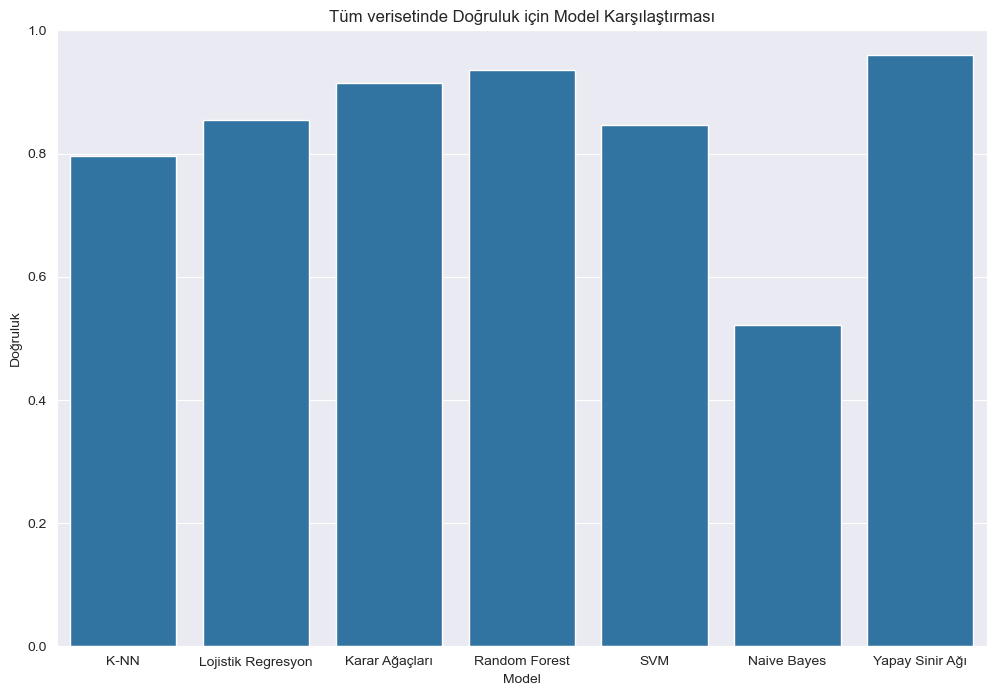

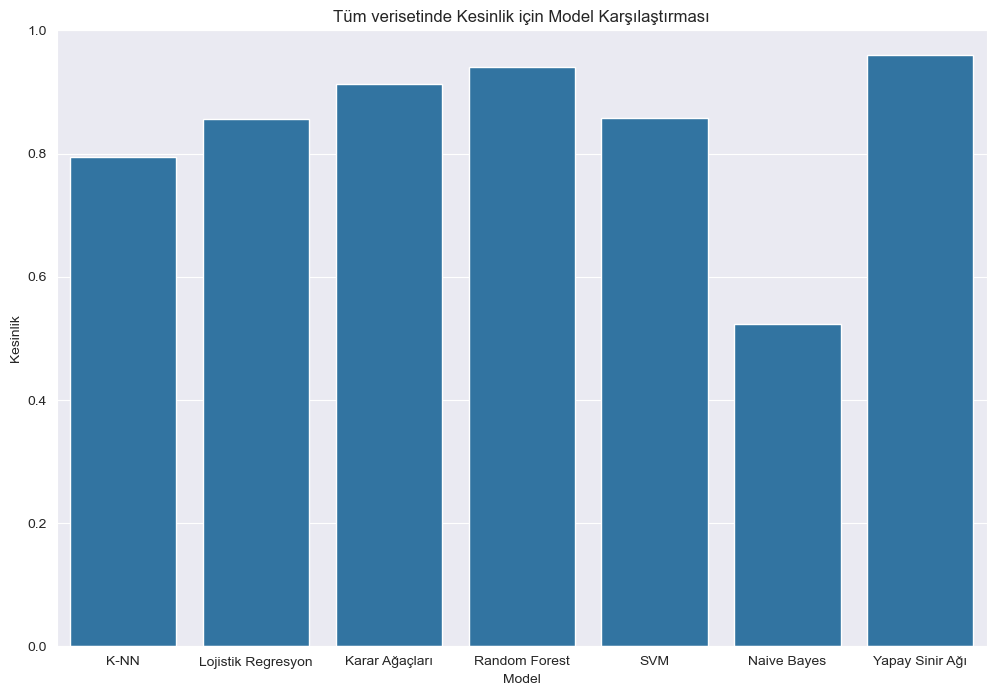

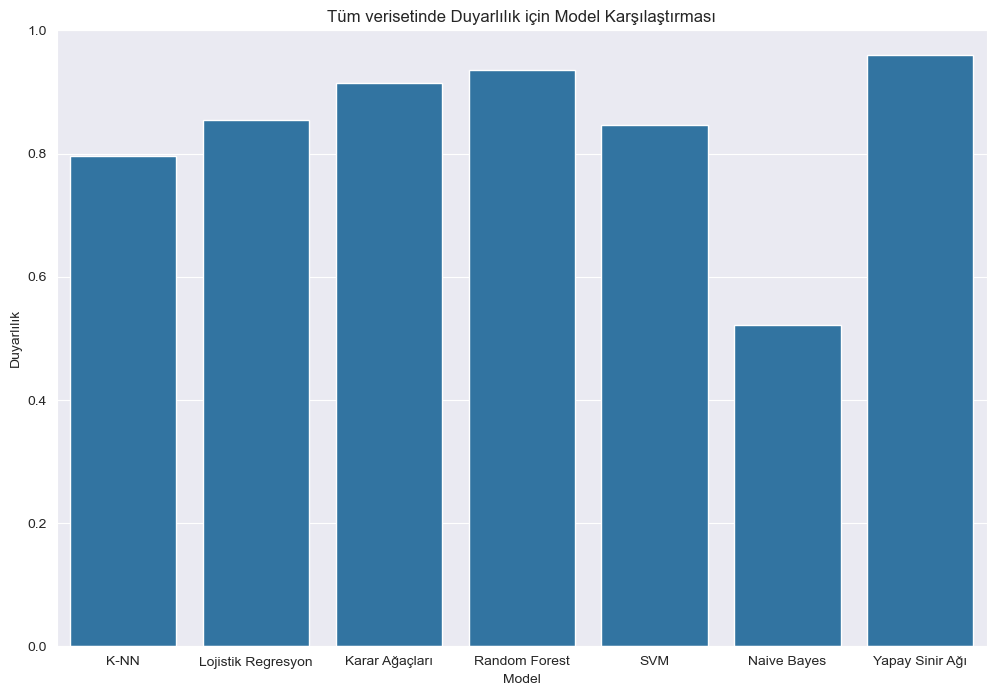

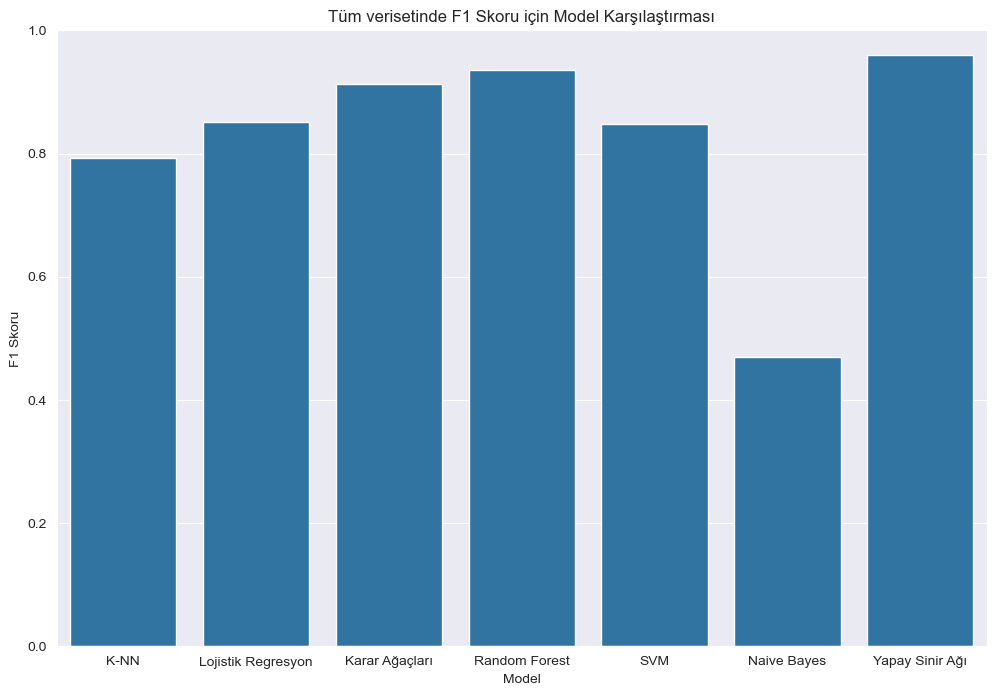

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # ANN için ekledik

warnings.filterwarnings('ignore')

# Verisetini yükleme
data = pd.read_csv('TemizlenmisData.csv')

# Verisetini önişleme sokma
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Kategorik verileri 'dummy' olarak tanımlama
X = pd.get_dummies(X)

# Veriyi test ve eğitim verisi olarak ikiye ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartize etme
olctlndr = StandardScaler()
X_train = olctlndr.fit_transform(X_train)
X_test = olctlndr.transform(X_test)

# Modelleri başlatma (ANN eklendi)
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=3),
    'Lojistik Regresyon': LogisticRegression(max_iter=1000),
    'Karar Ağaçları': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Yapay Sinir Ağı': MLPClassifier(hidden_layer_sizes=(128, 64,32), activation='tanh',solver='adam',  batch_size=32,
              learning_rate='adaptive', max_iter=5000, random_state=42)

}

# Sonuç değişkenine göre modellerin eğitilmesi ve değerlendirilmesi
sonuclar = {}
siniflar = y.unique()

for snf in siniflar:
    sonuclar[snf] = {}
    y_train_cls = (y_train == snf).astype(int)
    y_test_cls = (y_test == snf).astype(int)

    for model_adi, model in models.items():
        model.fit(X_train, y_train_cls)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test_cls, y_pred)
        precision = precision_score(y_test_cls, y_pred)
        recall = recall_score(y_test_cls, y_pred)
        f1 = f1_score(y_test_cls, y_pred)

        sonuclar[snf][model_adi] = {
            'Doğruluk': accuracy,
            'Kesinlik': precision,
            'Duyarlılık': recall,
            'F1 Skoru': f1
        }

# Bütün veriseti için her modelin değerlendirme ölçütlerinin hesaplanması
sonuclar['Bütün Veriseti için'] = {}

for model_adi, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    sonuclar['Bütün Veriseti için'][model_adi] = {
        'Doğruluk': accuracy,
        'Kesinlik': precision,
        'Duyarlılık': recall,
        'F1 Skoru': f1
    }
    '''
# Her sınıf için modellerin değerlendirme ölçütlerinin hesaplanması
olcutler = ['Doğruluk', 'Kesinlik', 'Duyarlılık', 'F1 Skoru']

for snf in siniflar:
    print(f"Sınıf: {snf}")
    results_df = pd.DataFrame(sonuclar[snf]).T
    print(results_df)

    for olct in olcutler:
        plt.figure(figsize=(12, 8))
        sns.barplot(x=results_df.index, y=results_df[olct])
        plt.title(f'{snf} Seviyesindeki {olct} için Model Performans Karşılaştırması')
        plt.xlabel('Model')
        plt.ylabel(olct)
        plt.ylim(0, 1)
        #plt.savefig(f'{snf}_{olct}.png')
        plt.show()
'''

print("Sınıf: Hepsi için")
butundataset_df = pd.DataFrame(sonuclar['Bütün Veriseti için']).T
print(butundataset_df)

for olct in olcutler:
    plt.figure(figsize=(12, 8))
    sns.barplot(x=butundataset_df.index, y=butundataset_df[olct])
    plt.title(f'Tüm verisetinde {olct} için Model Karşılaştırması')
    plt.xlabel('Model')
    plt.ylabel(olct)
    plt.ylim(0, 1)
    #plt.savefig(f'butun_dataset_{olct}.png')
    plt.show()


        NObeyesdad  Count
6    Yetersiz Kilo    272
5      Normal Kilo    287
3   Aşırı Kilolu I    290
4  Aşırı Kilolu II    290
0           Obez I    351
2          Obez II    297
1         Obez III    324


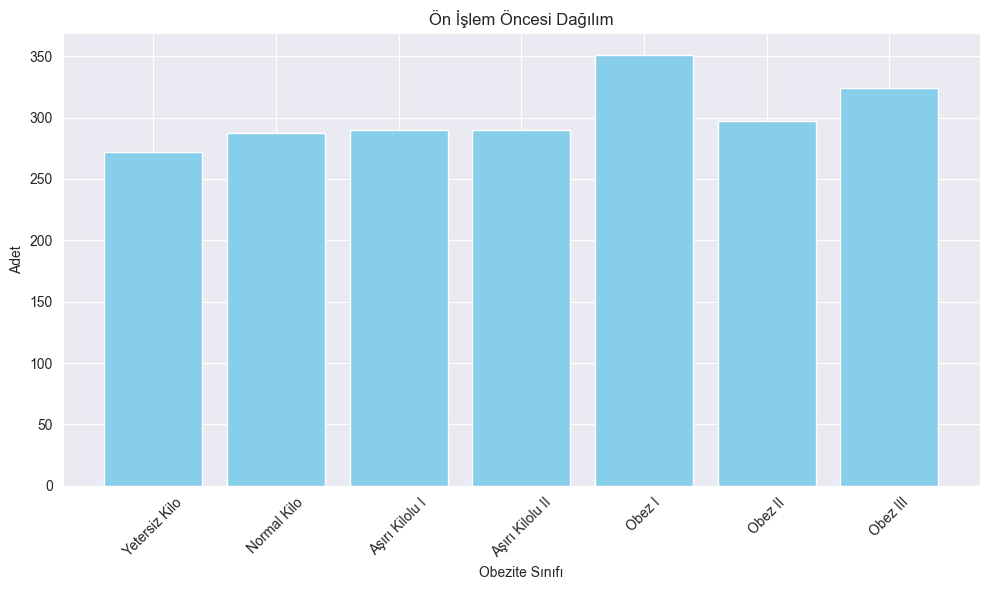

In [9]:
# Ön işlem öncesi NObeyesdad sınıfının dağılımı ve grafiğini veren kod
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('maindataset.csv')

distribution = df['NObeyesdad'].value_counts()

distribution_df = distribution.reset_index()
distribution_df.columns = ['NObeyesdad', 'Count']

order = ['Yetersiz Kilo', 'Normal Kilo', 'Aşırı Kilolu I', 'Aşırı Kilolu II', 'Obez I', 'Obez II', 'Obez III']
mapping = {
    'Insufficient_Weight': 'Yetersiz Kilo',
    'Normal_Weight': 'Normal Kilo',
    'Overweight_Level_I': 'Aşırı Kilolu I',
    'Overweight_Level_II': 'Aşırı Kilolu II',
    'Obesity_Type_I': 'Obez I',
    'Obesity_Type_II': 'Obez II',
    'Obesity_Type_III': 'Obez III'
}

distribution_df['NObeyesdad'] = distribution_df['NObeyesdad'].map(mapping)

distribution_df['NObeyesdad'] = pd.Categorical(distribution_df['NObeyesdad'], categories=order, ordered=True)
distribution_df = distribution_df.sort_values('NObeyesdad')

print(distribution_df)

plt.figure(figsize=(10, 6))
plt.bar(distribution_df['NObeyesdad'], distribution_df['Count'], color='skyblue')
plt.xlabel('Obezite Sınıfı')
plt.ylabel('Adet')
plt.title('Ön İşlem Öncesi Dağılım')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        NObeyesdad  Count
6    Yetersiz Kilo    272
5      Normal Kilo    287
3   Aşırı Kilolu I    290
4  Aşırı Kilolu II    290
0           Obez I    351
2          Obez II    297
1         Obez III    301


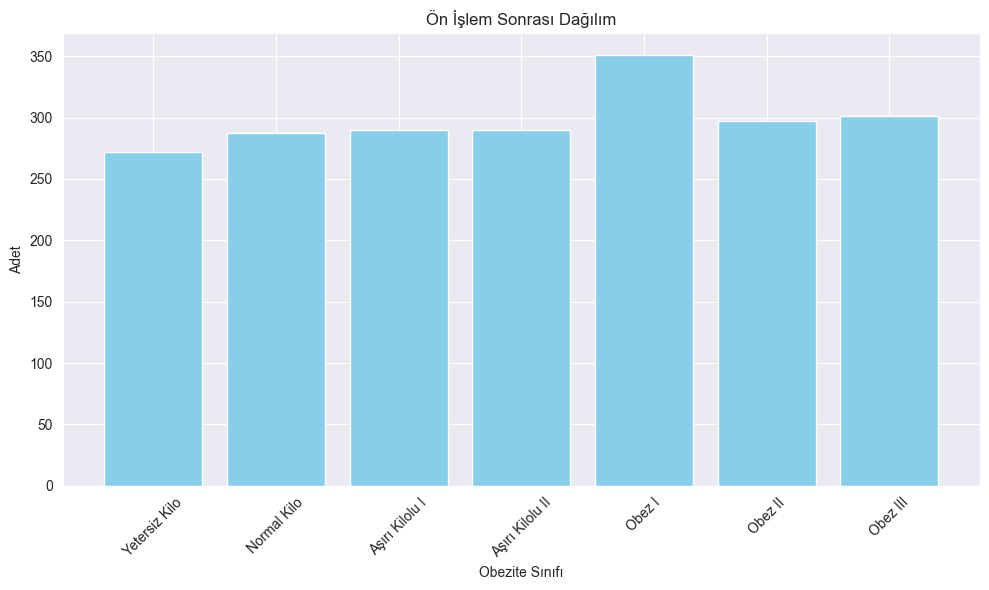

In [10]:
# Ön işlem sonrası NObeyesdad sınıfının dağılımı ve grafiğini veren kod
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TemizlenmisData.csv')

distribution = df['NObeyesdad'].value_counts()

distribution_df = distribution.reset_index()
distribution_df.columns = ['NObeyesdad', 'Count']

order = ['Yetersiz Kilo', 'Normal Kilo', 'Aşırı Kilolu I', 'Aşırı Kilolu II', 'Obez I', 'Obez II', 'Obez III']
mapping = {
    'Insufficient_Weight': 'Yetersiz Kilo',
    'Normal_Weight': 'Normal Kilo',
    'Overweight_Level_I': 'Aşırı Kilolu I',
    'Overweight_Level_II': 'Aşırı Kilolu II',
    'Obesity_Type_I': 'Obez I',
    'Obesity_Type_II': 'Obez II',
    'Obesity_Type_III': 'Obez III'
}

distribution_df['NObeyesdad'] = distribution_df['NObeyesdad'].map(mapping)

distribution_df['NObeyesdad'] = pd.Categorical(distribution_df['NObeyesdad'], categories=order, ordered=True)
distribution_df = distribution_df.sort_values('NObeyesdad')

print(distribution_df)

plt.figure(figsize=(10, 6))
plt.bar(distribution_df['NObeyesdad'], distribution_df['Count'], color='skyblue')
plt.xlabel('Obezite Sınıfı')
plt.ylabel('Adet')
plt.title('Ön İşlem Sonrası Dağılım')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/yn/8hqqfq1506s61lrz6d034bqw0000gn/T/ipykernel_1659/365177700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


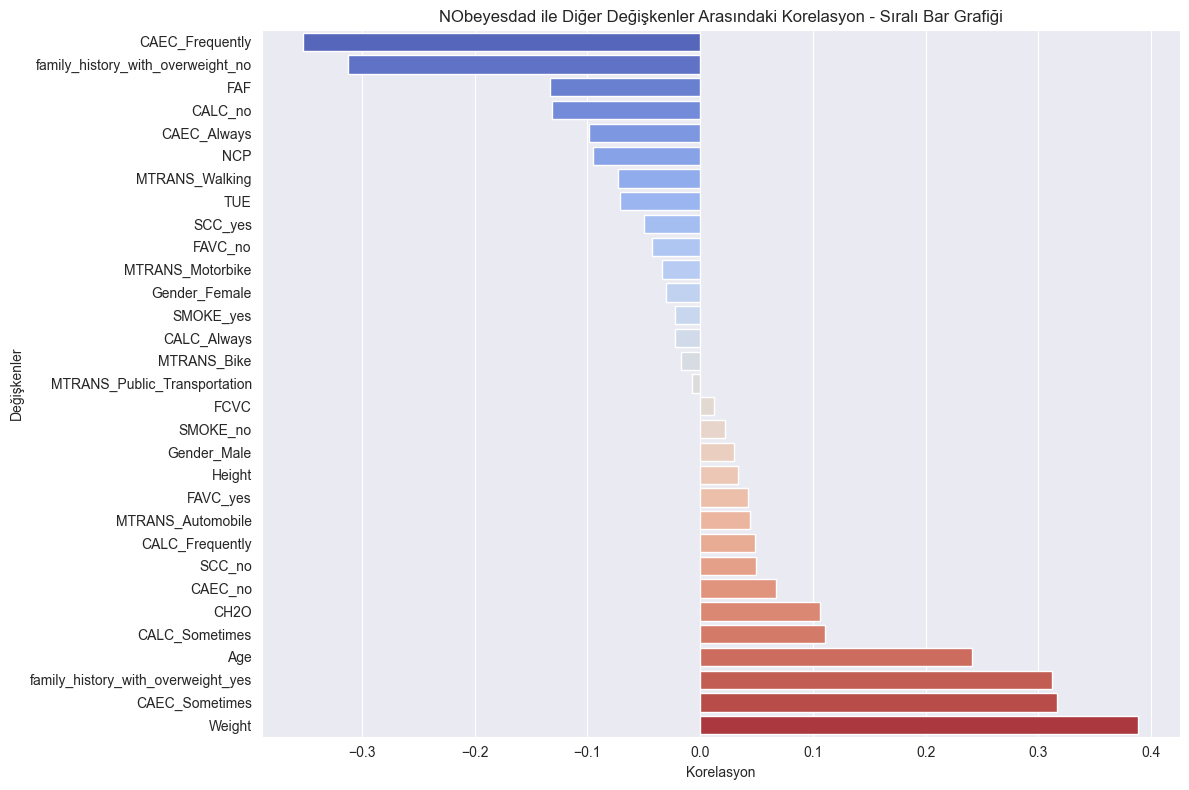

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Veriyi yükleyin
data = pd.read_csv('TemizlenmisData.csv')

# "NObeyesdad" sütununu kategorik olanı sayısal hale getirelim
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Verisetini önişleme sokma
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Kategorik verileri 'dummy' olarak tanımlama
X = pd.get_dummies(X)

# "NObeyesdad" sütunu ile sayısal sütunlar arasındaki korelasyonu hesaplayın
correlation_with_target = X.join(y).corr()['NObeyesdad'].drop('NObeyesdad')

# Korelasyonları sıralı bir bar grafiği ile görselleştirin
plt.figure(figsize=(12, 8))
correlation_with_target = correlation_with_target.sort_values(ascending=True)
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('NObeyesdad ile Diğer Değişkenler Arasındaki Korelasyon - Sıralı Bar Grafiği')
plt.xlabel('Korelasyon')
plt.ylabel('Değişkenler')
plt.tight_layout()
plt.show()